<a href="https://colab.research.google.com/github/min346/DS-ASM/blob/min/DS_ASM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#df = pd.read_csv(r"C:\Users\minli\Downloads\heart_disease.csv") # Jupyter
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/heart_disease.csv") # Google Colab
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [4]:
# show number of rows and columns
df.shape

(10000, 21)

In [5]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [6]:
# show basic info (Non-Null Count means no of valid data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

**df.describe()**

count = no of valid values

mean = average of ALL values

In [7]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [8]:
# show total duplicated amount
df.duplicated().sum()

np.int64(0)

In [9]:
# Check amount of null data
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


# Data Visualization

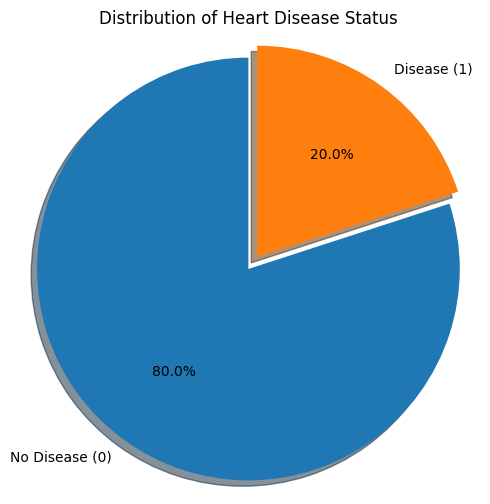

In [10]:
# Count the number of each target class
target_counts = df['Heart Disease Status'].value_counts()

# Define labels for the pie chart
labels = ['No Disease (0)', 'Disease (1)']

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True, explode=[0.07, 0])
plt.title('Distribution of Heart Disease Status')
plt.axis('equal')
plt.show()

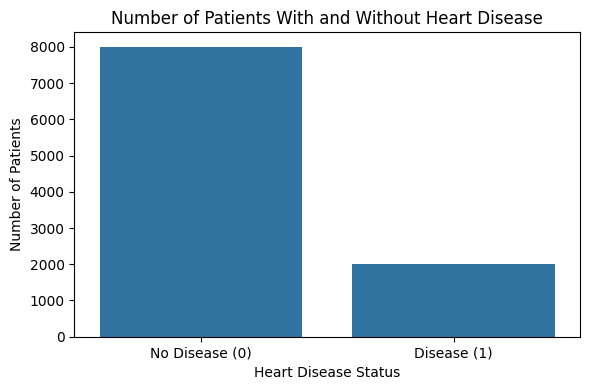

In [11]:
# Create a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values)

# Add labels and title
plt.xlabel('Heart Disease Status')
plt.ylabel('Number of Patients')
plt.title('Number of Patients With and Without Heart Disease')
plt.xticks([0, 1], ['No Disease (0)', 'Disease (1)'])

# Show plot
plt.tight_layout()
plt.show()

In [12]:
print(target_counts)

Heart Disease Status
No     8000
Yes    2000
Name: count, dtype: int64


# Data Preprocessing

## Missing Value

In [13]:
# Check missing values
missing_values = df.isnull().sum()

In [14]:
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [15]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Check the shape of the dataset before and after dropping
print("Original dataset shape:", df.shape)
print("After dropping missing values:", df_cleaned.shape)

Original dataset shape: (10000, 21)
After dropping missing values: (7067, 21)


In [16]:
# Recheck for Missing Values
df_cleaned.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


In [17]:
# Check total number of cells
total_cells = np.prod(df.shape)

# Count total missing values
total_missing = df.isnull().sum().sum()

# Calculate percentage of missing values
percent_missing = (total_missing / total_cells) * 100

print(f"Percentage of missing values in the dataset: {percent_missing:.2f}%")

Percentage of missing values in the dataset: 1.45%


In [18]:
# Dataset overview
df.info()
print("Dataset shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

## Outlier

In [19]:
# Select only numeric columns
numerical_columns = [
    'Age', 'Blood Pressure', 'Cholesterol Level', 'BMI',
    'Triglyceride Level', 'Fasting Blood Sugar', 'Sleep Hours',
    'CRP Level', 'Homocysteine Level'
]

# Outlier detection using IQR for specified columns
outlier_summary = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    outlier_summary[col] = outlier_count

# Convert to DataFrame
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
print(outlier_df.sort_values(by='Outlier Count', ascending=False))

                     Outlier Count
Age                              0
Blood Pressure                   0
Cholesterol Level                0
BMI                              0
Triglyceride Level               0
Fasting Blood Sugar              0
Sleep Hours                      0
CRP Level                        0
Homocysteine Level               0


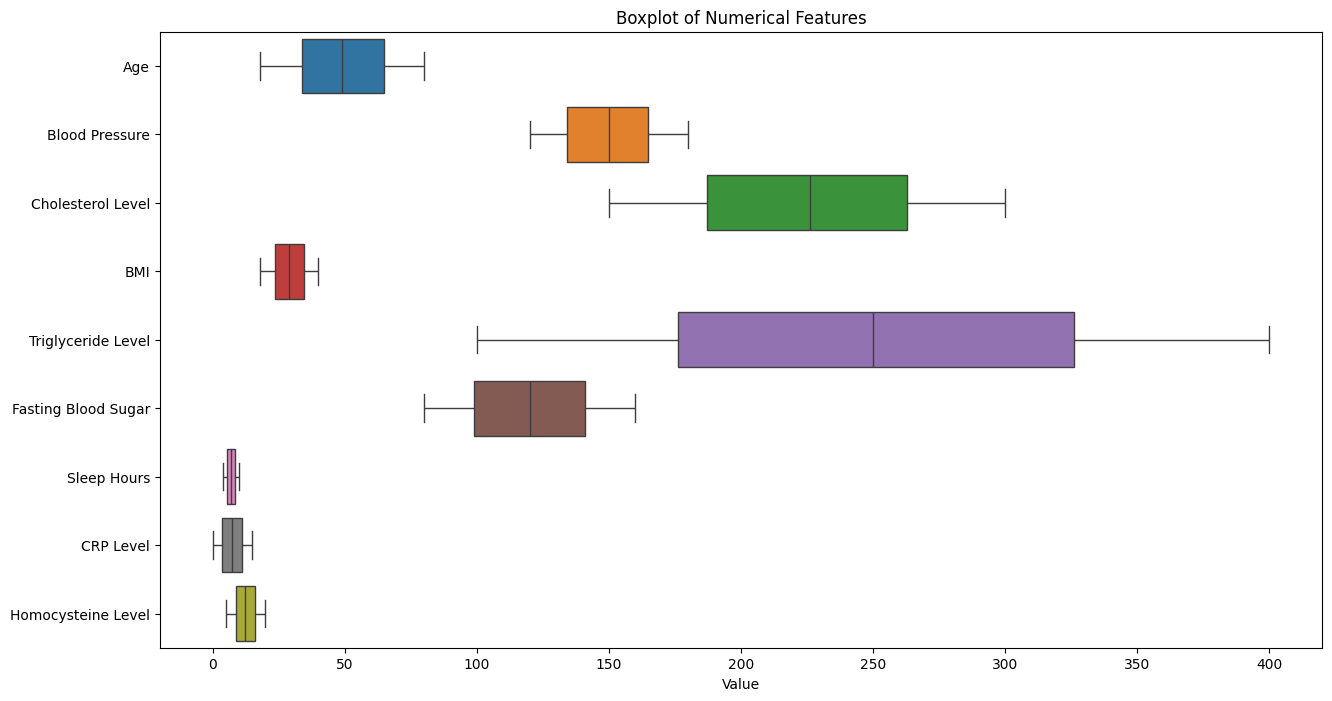

In [20]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns], orient='h')
plt.title("Boxplot of Numerical Features")
plt.xlabel("Value")
plt.show()

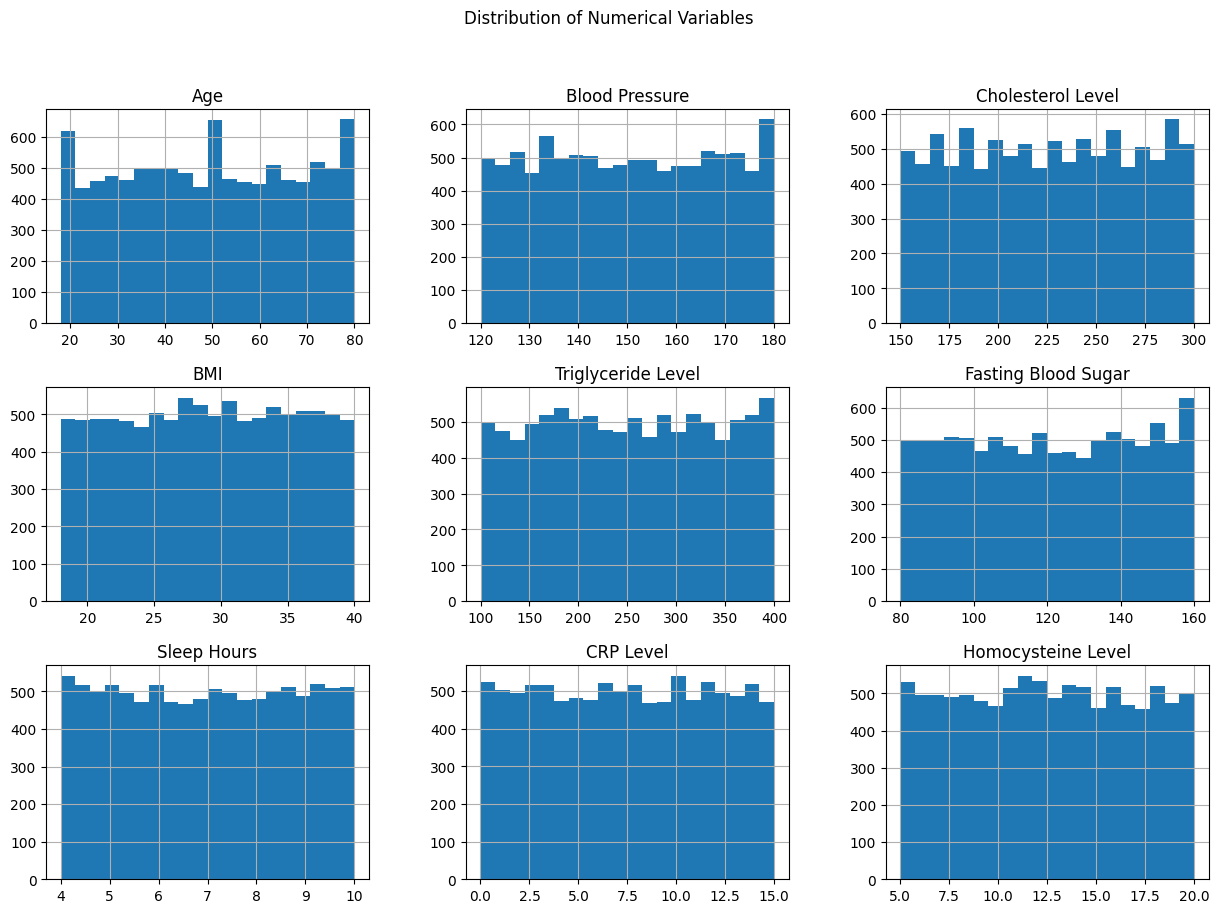

In [21]:
df[numerical_columns].hist(bins=20, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Distribution of Numerical Variables")
plt.show()

## Data Encoding for Categorical Variables

In [22]:
# Copy the cleaned data
df_encoded = df_cleaned.copy()

In [23]:
# Label encode 4 ordinal columns
label_map = {'Low': 0, 'Medium': 1, 'High': 2}
label_cols = ['Exercise Habits', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']
for col in label_cols:
    df_encoded[col] = df_encoded[col].map(label_map)

In [24]:
# One-Hot encode 7 binary columns
one_hot_cols = ['Gender', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol']
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

In [25]:
# Convert boolean True/False to integers
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [26]:
# Encode target
df_encoded['Heart Disease Status'] = df_encoded['Heart Disease Status'].map({'Yes': 1, 'No': 0})

In [27]:
df_encoded

,Age,Blood Pressure,Cholesterol Level,Exercise Habits,BMI,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,...,CRP Level,Homocysteine Level,Heart Disease Status,Gender_Male,Smoking_Yes,Family Heart Disease_Yes,Diabetes_Yes,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes
1,69.0,146.0,286.0,2,25.221799,1,2,8.744034,1,133.0,...,9.355389,19.298875,0,0,0,1,1,0,1,0
2,46.0,126.0,216.0,0,29.855447,0,0,4.440440,0,393.0,...,12.709873,11.230926,0,1,0,0,0,0,1,1
3,32.0,122.0,293.0,2,24.130477,0,2,5.249405,2,293.0,...,12.509046,5.961958,0,0,1,1,0,1,0,1
4,60.0,166.0,242.0,0,20.486289,0,2,7.030971,2,263.0,...,10.381259,8.153887,0,1,1,1,1,1,0,0
5,25.0,152.0,257.0,0,28.144681,0,1,5.504876,0,126.0,...,4.297575,10.815983,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,68.0,169.0,291.0,1,22.839718,1,0,6.057509,2,299.0,...,3.321020,11.910244,1,0,1,0,0,0,1,0
9994,73.0,144.0,191.0,1,39.459620,1,0,7.549114,1,200.0,...,1.154904,8.021732,1,0,1,1,1,0,0,0
9995,25.0,136.0,243.0,1,18.788791,1,2,6.834954,1,343.0,...,3.588814,19.132004,1,0,1,0,0,1,0,1
9998,23.0,142.0,299.0,0,34.964026,1,2,8.526329,1,113.0,...,7.215634,11.873486,1,1,1,0,1,1,0,1


## Normalization

In [28]:
# List of columns to normalize
cols_to_normalize = [
    'Age', 'Blood Pressure', 'Cholesterol Level', 'BMI','Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level'
]

In [29]:
# Apply normalization
scaler = MinMaxScaler()
df_encoded[cols_to_normalize] = scaler.fit_transform(df_encoded[cols_to_normalize])

In [30]:
df_encoded

,Age,Blood Pressure,Cholesterol Level,Exercise Habits,BMI,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,...,CRP Level,Homocysteine Level,Heart Disease Status,Gender_Male,Smoking_Yes,Family Heart Disease_Yes,Diabetes_Yes,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes
1,0.822581,0.433333,0.906667,2,0.328093,1,2,0.790657,1,0.110000,...,0.623548,0.953311,0,0,0,1,1,0,1,0
2,0.451613,0.100000,0.440000,0,0.538811,0,0,0.073314,0,0.976667,...,0.847382,0.415312,0,1,0,0,0,0,1,1
3,0.225806,0.033333,0.953333,2,0.278465,0,2,0.208156,2,0.643333,...,0.833981,0.063959,0,0,1,1,0,1,0,1
4,0.677419,0.766667,0.613333,0,0.112744,0,2,0.505116,2,0.543333,...,0.692001,0.210125,0,1,1,1,1,1,0,0
5,0.112903,0.533333,0.713333,0,0.461013,0,1,0.250739,0,0.086667,...,0.286057,0.387642,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0.806452,0.816667,0.940000,1,0.219767,1,0,0.342855,2,0.663333,...,0.220894,0.460611,1,0,1,0,0,0,1,0
9994,0.887097,0.400000,0.273333,1,0.975565,1,0,0.591482,1,0.333333,...,0.076357,0.201312,1,0,1,1,1,0,0,0
9995,0.112903,0.266667,0.620000,1,0.035550,1,2,0.472443,1,0.810000,...,0.238763,0.942183,1,0,1,0,0,1,0,1
9998,0.080645,0.366667,0.993333,0,0.771125,1,2,0.754369,1,0.043333,...,0.480769,0.458160,1,1,1,0,1,1,0,1


## Balanced Data

In [31]:
# balanced data
from imblearn.over_sampling import SMOTE

X = df_encoded.drop('Heart Disease Status', axis=1)
y = df_encoded['Heart Disease Status']

smote = SMOTE(sampling_strategy=0.8, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [32]:
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Heart Disease Status'] = y_resampled

In [33]:
resampled_df

,Age,Blood Pressure,Cholesterol Level,Exercise Habits,BMI,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,...,CRP Level,Homocysteine Level,Gender_Male,Smoking_Yes,Family Heart Disease_Yes,Diabetes_Yes,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes,Heart Disease Status
0,0.822581,0.433333,0.906667,2,0.328093,1,2,0.790657,1,0.110000,...,0.623548,0.953311,0,0,1,1,0,1,0,0
1,0.451613,0.100000,0.440000,0,0.538811,0,0,0.073314,0,0.976667,...,0.847382,0.415312,1,0,0,0,0,1,1,0
2,0.225806,0.033333,0.953333,2,0.278465,0,2,0.208156,2,0.643333,...,0.833981,0.063959,0,1,1,0,1,0,1,0
3,0.677419,0.766667,0.613333,0,0.112744,0,2,0.505116,2,0.543333,...,0.692001,0.210125,1,1,1,1,1,0,0,0
4,0.112903,0.533333,0.713333,0,0.461013,0,1,0.250739,0,0.086667,...,0.286057,0.387642,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10132,0.775155,0.234079,0.149691,2,0.700224,1,0,0.900018,0,0.306986,...,0.669218,0.425196,1,1,1,1,1,0,1,1
10133,0.535666,0.850000,0.692181,0,0.919929,1,2,0.822002,0,0.691485,...,0.316111,0.341611,0,0,1,1,1,0,0,1
10134,0.700382,0.259037,0.615200,2,0.427861,1,0,0.504231,2,0.521891,...,0.311117,0.099722,0,0,1,0,1,1,1,1
10135,0.378853,0.066914,0.585979,2,0.433498,0,2,0.677591,0,0.321998,...,0.248322,0.284995,1,0,1,1,0,1,1,1


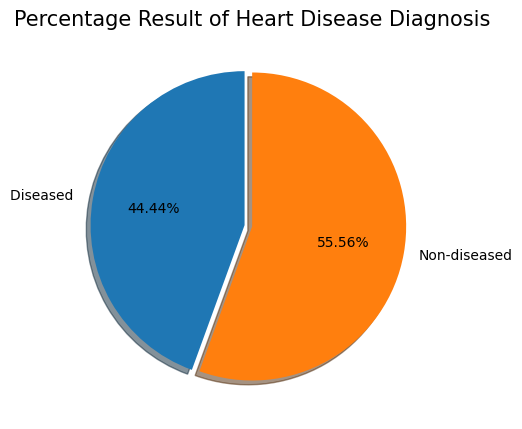

In [34]:
plt.figure(figsize=(5,5))
disease = len(resampled_df[resampled_df['Heart Disease Status'] == 1])
non_disease = len(resampled_df[resampled_df['Heart Disease Status'] == 0])
plt.title("Percentage Result of Heart Disease Diagnosis",fontsize = 15)
plt.pie(x=[disease, non_disease], explode=[0.05, 0], labels=['Diseased ', 'Non-diseased'], autopct='%1.2f%%', shadow=True, startangle = 90)
plt.show()

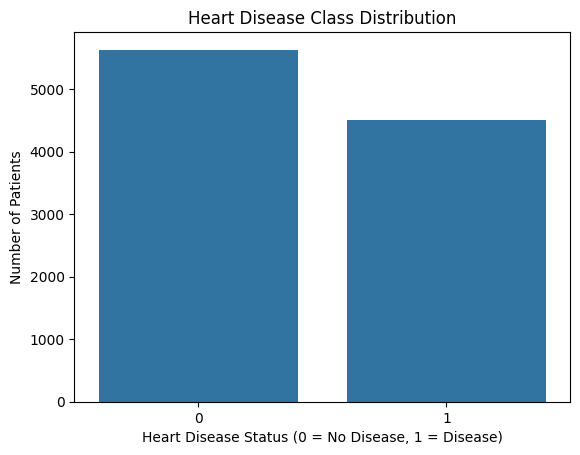

In [35]:
sns.countplot(x='Heart Disease Status', data=resampled_df)
plt.title('Heart Disease Class Distribution')
plt.xlabel('Heart Disease Status (0 = No Disease, 1 = Disease)')
plt.ylabel('Number of Patients')
plt.show()

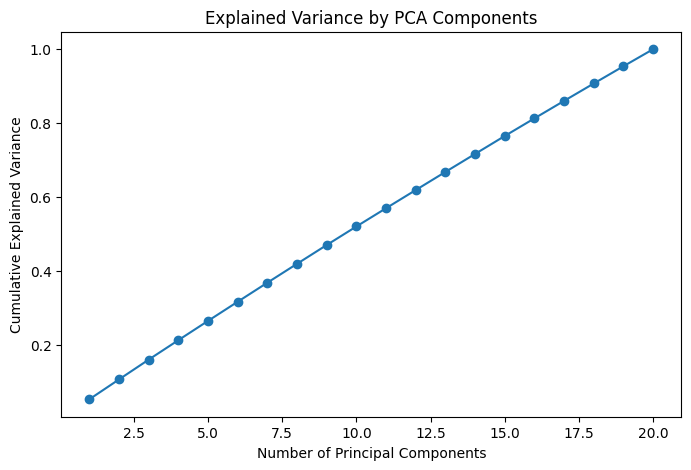

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Select features (X only, exclude target)
X = df_encoded.drop('Heart Disease Status', axis=1)

# Step 2: Scale data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 4: Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot variance explained
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

In [38]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X = df_encoded.drop('Heart Disease Status', axis=1)
y = df_encoded['Heart Disease Status']

# Mutual information (discrete features)
mi = mutual_info_classif(X, y, discrete_features=True, random_state=42)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("Mutual Information with Heart Disease Status:\n", mi_scores)


Mutual Information with Heart Disease Status:
 Homocysteine Level          0.504610
CRP Level                   0.504610
Sleep Hours                 0.504610
BMI                         0.504610
Triglyceride Level          0.022585
Cholesterol Level           0.013559
Fasting Blood Sugar         0.007979
Age                         0.004516
Blood Pressure              0.004042
Stress Level                0.000540
Sugar Consumption           0.000256
Exercise Habits             0.000092
Alcohol Consumption         0.000076
Gender_Male                 0.000034
Smoking_Yes                 0.000020
High Blood Pressure_Yes     0.000016
Family Heart Disease_Yes    0.000003
Diabetes_Yes                0.000002
Low HDL Cholesterol_Yes     0.000002
High LDL Cholesterol_Yes    0.000002
dtype: float64


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

In [41]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

X = df_encoded.drop('Heart Disease Status', axis=1)
y = df_encoded['Heart Disease Status']

# Train a simple decision tree
tree = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree.fit(X, y)

# Information gain = feature importance (based on entropy)
ig_scores = tree.feature_importances_

# Put into DataFrame
ig_df = pd.DataFrame({"Feature": X.columns, "IG": ig_scores})
print(ig_df.sort_values(by="IG", ascending=False))

                     Feature        IG
12        Homocysteine Level  0.111447
4                        BMI  0.108486
11                 CRP Level  0.098711
10       Fasting Blood Sugar  0.091788
0                        Age  0.091536
2          Cholesterol Level  0.090861
1             Blood Pressure  0.090083
9         Triglyceride Level  0.086002
7                Sleep Hours  0.085764
3            Exercise Habits  0.022674
8          Sugar Consumption  0.020364
6               Stress Level  0.018022
14               Smoking_Yes  0.014645
5        Alcohol Consumption  0.012952
18   Low HDL Cholesterol_Yes  0.011688
19  High LDL Cholesterol_Yes  0.010839
17   High Blood Pressure_Yes  0.009705
13               Gender_Male  0.009567
15  Family Heart Disease_Yes  0.008370
16              Diabetes_Yes  0.006497


In [47]:
import numpy as np
import pandas as pd

def fisher_score_feature(X, y):
    """Compute Fisher score for a single feature"""
    classes = np.unique(y)
    overall_mean = np.mean(X)
    numerator, denominator = 0, 0

    for c in classes:
        X_c = X[y == c]
        mean_c = np.mean(X_c)
        var_c = np.var(X_c)
        numerator += len(X_c) * (mean_c - overall_mean)**2
        denominator += len(X_c) * var_c

    return numerator / denominator if denominator > 0 else 0

# Example on your dataset
X = df_encoded.drop('Heart Disease Status', axis=1)
y = df_encoded['Heart Disease Status'].values

scores = {col: fisher_score_feature(X[col].values, y) for col in X.columns}
fisher_df = pd.DataFrame.from_dict(scores, orient="index", columns=["FisherScore"])
fisher_df = fisher_df.sort_values(by="FisherScore", ascending=False)

print(fisher_df)

                          FisherScore
Sugar Consumption            0.000511
BMI                          0.000482
Blood Pressure               0.000365
Homocysteine Level           0.000139
Triglyceride Level           0.000135
Exercise Habits              0.000109
Cholesterol Level            0.000075
Gender_Male                  0.000068
Sleep Hours                  0.000059
Stress Level                 0.000051
Alcohol Consumption          0.000050
Smoking_Yes                  0.000041
Age                          0.000039
High Blood Pressure_Yes      0.000032
CRP Level                    0.000029
Family Heart Disease_Yes     0.000005
Diabetes_Yes                 0.000004
Low HDL Cholesterol_Yes      0.000004
High LDL Cholesterol_Yes     0.000003
Fasting Blood Sugar          0.000002
